extra_javascript:
    myscript.js

## SatSolver Performance Measurements
Эксперимент будет проводиться на ноутбуке __Huawei Matebook D14__ модели __NBM_WDH9 2020__ года выпуска.
> На ноутбуке установлена операционная система _Windows 11  21h2_  
>  Процессор _AMD Ryzen 5 5500U <br>with Radeon Graphics 2.10 GHz_ на 6 ядер,  
>  логических процессоров: 12.  
>  _RAM_ - 8гб, также устанолен файл подкачки на 4гб.  
>  Ноутбук подключен к источнику питания.
  
Для проведения эксперимента я отключил обновления, сбросил весь кэш, отключил все фоновые приложения, в том числе, закрыл браузер, стабилизировал частоту CPU, выставив ее на максимальный уровень, выставил режим питания - максимальная производительность.
Проверил алгоритм работы SatSolvera, на данных, на которых будет проводится тестирование.

[Данные, на которых будет проводиться эксперемент](sat.cnf)

[Полученные результаты, после проведения замеров](results.txt)

##### После проведения 40 замеров, получили следующий результат:

<p align="center">
    <img src="images/Figure_1.png" alt="тут должна быть гистограмма">
</p>

[0.489, 0.481, 0.478, 0.477, 0.476, 0.487, 0.478, 0.485, 0.489, 0.478, 0.486, 0.478, 0.483, 0.479, 0.483, 0.477, 0.481, 0.48, 0.485, 0.484, 0.48, 0.48, 0.48, 0.475, 0.479, 0.479, 0.477, 0.479, 0.477, 0.48, 0.476, 0.48, 0.479, 0.483, 0.477, 0.479, 0.484, 0.476, 0.475, 0.485]


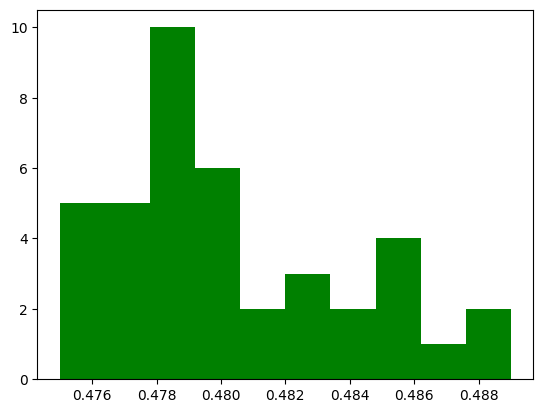

In [30]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import interval

with open("results.txt") as file:
    t = list(map(lambda x: float(x), file.readlines()[0][1:-2].split(",")))
print(t)

plt.hist(t,facecolor = 'green')
plt.show()

А также получили p-value = $0.1497 > 0.05$. Следовательно данные прошли проверку на нормальность.

In [31]:
(stat,p_value) = stats.normaltest(t)
print(p_value)

0.14966397327928804


#### Следующим шагом было вычесление  среднего, стандартного отклонения и стандартного отклонения среднего.

1. Считаем среднее арифметическое: $$ a_{ср. арифм.}=\frac{a_1+...+a_n}{n}$$ 

    average = $0.48034999999999994$


In [32]:
average = np.mean(t)
print(average)

0.48034999999999994


2. Стандартное отклонение считается по следующей формуле: $$ \sigma_{с.о.}=\sqrt{\frac{\sum{(\overline x - x_i)^2}}{n-1}}$$ 
    где n - количество замеров, $\overline x$ - наше среднее

    standart_deviation = $0.0037317075214492695$

In [33]:
standart_deviation = (sum(list(map(lambda x: (average-x) ** 2, t)))/(len(t)-1))**(0.5)
print(standart_deviation)

0.0037317075214492695


3. Стандартное отклонение среднего найдем по формуле: $$ \sigma_{с.о.с.}=\frac{\sigma_{с.о.}}{\sqrt{n}}$$ 

    standart_deviation_average = $0.0005900347664680669$

In [34]:
standart_error_mean = standart_deviation/((len(t))**(0.5))
print(standart_error_mean)

0.0005900347664680669


#### Вычисляем погрешность - половина длины доверительного интервала:

$2*\sigma_{c.o.c.} = 0.0012$

$2*\sigma_{c.o.} = 0.007$

In [35]:
error = 2 * standart_error_mean
print(error)
error_standart = 2 * standart_deviation
print(error_standart)

0.0011800695329361338
0.007463415042898539


#### Далее ищем 95% предсказывающий и доверительный интервалы.
Предсказывающий интервал: $\overline x \pm 2*\sigma_{с.о.}$

$0.4 \pm 0.007$

In [36]:
predictive_interval = interval.Interval(average - 2*standart_deviation, average + 2*standart_deviation)
print(predictive_interval)

[0.4728865849571014..0.4878134150428985]


Доверительный интервал: $\overline x \pm 2*\sigma_{с.о.c.}$

$0.4 \pm 0.0012$

In [37]:
confidence_interval = interval.Interval(average - 2*standart_error_mean, average + 2*standart_error_mean)
print(confidence_interval)

[0.4791699304670638..0.4815300695329361]


Повторный эксперимент был выделен в отдельный файлик:
[жмяк](Second_test.ipynb)